# Visual Captioning と Visual Q&A を PaLM API と組み合わせて、ファッションを褒めるメッセージを生成する例

テスト用の画像をダウンロードします。

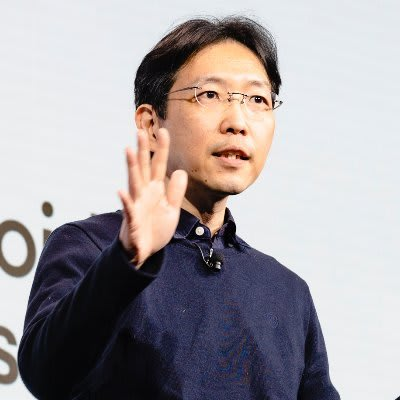

In [1]:
!wget -q -O image.jpg \
  https://raw.githubusercontent.com/enakai00/cloud_genAI_app_book/main/images/profile.png

from IPython.display import Image as display_image
display_image(filename='image.jpg', width=200)

Visual Captioning で画像の内容をテキスト文書で表現します。

In [2]:
from vertexai.preview.vision_models import ImageCaptioningModel
image_captioning_model = ImageCaptioningModel.from_pretrained('imagetext@001')

def get_image_description(image):
    results = image_captioning_model.get_captions(
        image=image, number_of_results=3)
    results.sort(key=len)
    return results[-1]

In [3]:
from vertexai.preview.vision_models import Image
image = Image.load_from_file('image.jpg')

get_image_description(image)

'a man wearing glasses and a blue sweater is giving a speech .'

Visual Q&A で画像に含まれるファッションアイテムを取り出します。

In [4]:
from vertexai.preview.vision_models import ImageQnAModel
image_qna_model = ImageQnAModel.from_pretrained('imagetext@001')

def get_fashion_items(image):
    results = image_qna_model.ask_question(
      image=image,
      question='details of the fashion items in the picture.',
      number_of_results=3)
    results.sort(key=len)
    return results[-1]

In [5]:
get_fashion_items(image)

'sweater, glasses'

画像から取り出した情報を用いて、ファッションを褒める文章を PaLM API で生成します。

In [6]:
from vertexai.preview.language_models import TextGenerationModel
generation_model = TextGenerationModel.from_pretrained('text-bison@001')

def get_compliment_message(image_file):
    prompt = '''\
ファッションアドバイザーの立場で、以下の様に記述される人物を褒め称える文章を作ってください。
ファッションアイテムに言及しながら、その人物に語りかける様に、数行の文章を作ってください。
個人を特定する名前は使用しないでください。

記述：{}

ファッションアイテム：{}
'''

    image = Image.load_from_file(image_file)
    description = get_image_description(image)
    items = get_fashion_items(image)
    response = generation_model.predict(
        prompt.format(description, items),
        temperature=0.2, max_output_tokens=1024)
    return response.text

In [7]:
get_compliment_message('image.jpg')

'素晴らしいスピーチをありがとうございます。その青いセーターとメガネが、あなたの知性と自信を際立たせています。あなたは、間違いなく、聴衆を魅了しました。'

他の画像でもテストします。

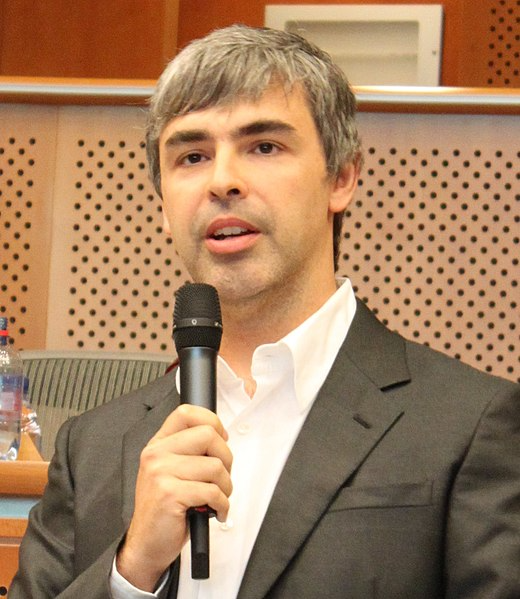

In [8]:
!wget -q -O image.jpg \
  https://raw.githubusercontent.com/enakai00/cloud_genAI_app_book/main/images/Larry_Page.png

display_image(filename='image.jpg', width=200)

In [9]:
get_compliment_message('image.jpg')

'素晴らしいスーツと白いシャツを着て、マイクを握っているあなたは、とても洗練されていて、自信に満ちています。このルックは、あなたのプロ意識と自信を完璧に表現しています。'